In [17]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [36]:
simulation_mean_df = pd.read_json('simulation_data.json', orient= 'index')
num_rows, num_cols = simulation_mean_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

AttributeError: 'list' object has no attribute 'values'

In [18]:
# function to load the simulation data from the json file
def load_config(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

In [29]:
# Load the sample mean and convert to a pandas data frame

#config = load_config('simulation_data.json')
config_sample_mean = load_config('simulation_sample_means.json')


# Convert the json file data into a pandas DataFrame
df_sample_mean = pd.DataFrame(config_sample_mean)
df_sample_mean.head()





,0
0,0.576626
1,0.384664
2,0.361026
3,0.352642
4,0.352414


In [30]:
# Load the sample standard deviation and convert it to a pandas dataframe

config_sample_std = load_config('simulation_sample_std.json')

df_sample_std = pd.DataFrame(config_sample_std)
df_sample_std.head()

,0
0,0.081868
1,0.026741
2,0.014401
3,0.017865
4,0.018489


In [31]:
# The following plot shows the waiting times for all the festival goers for each number of servers in the system

df_melted = pd.melt(df_sample_mean, value_name="Average Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
df_sample_mean.index = df_sample_mean.index + 1 # this switches the x-axis labels to strat from 1 instead of 0



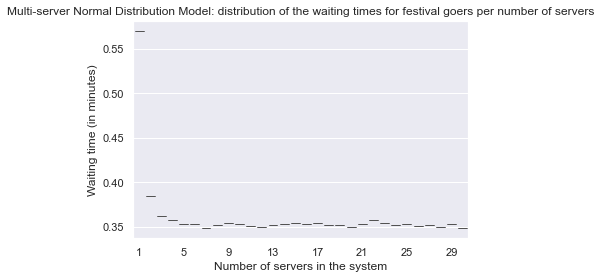

In [24]:
ax = sns.boxplot(data=df_melted, x=df_sample_mean.index, y="Average Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))


xticks_interval = 4
labels = ax.get_xticks()[::xticks_interval] 
ax.set_xticks(labels)

plt.title("Multi-server Normal Distribution Model: distribution of the waiting times for festival goers per number of servers")
#plt.title("Distribution of Waiting Times for Festival Goers Generated by the Normal Distribution Model")
plt.xlabel("Number of servers in the system")
plt.ylabel("Waiting time (in minutes)")
plt.show()

<Figure size 720x432 with 0 Axes>

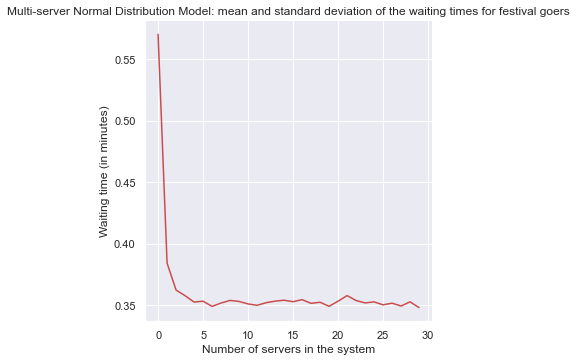

In [26]:
plt.figure(figsize=(10, 6))
sns.relplot(x=df_melted.index, y="Average Waiting Time", 
             data=df_melted, kind="line", errorbar="sd", color="#c94c4c") #color="#034f84") HOW MANY STANDARD DEVIATIONS -> ONE FROM THE MEAN

plt.title("Multi-server Normal Distribution Model: mean and standard deviation of the waiting times for festival goers")
#plt.title("Distribution of Waiting Times for Festival Goers generated by the Normal Distribution Model")
plt.xlabel("Number of servers in the system")
plt.ylabel("Waiting time (in minutes)")
plt.show()

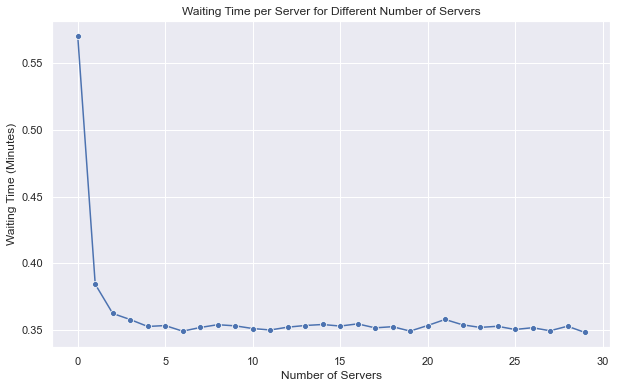

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_melted.index, y='Average Waiting Time', data=df_melted, marker='o', errorbar="sd")
plt.title("Waiting Time per Server for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time (Minutes)")
plt.show()

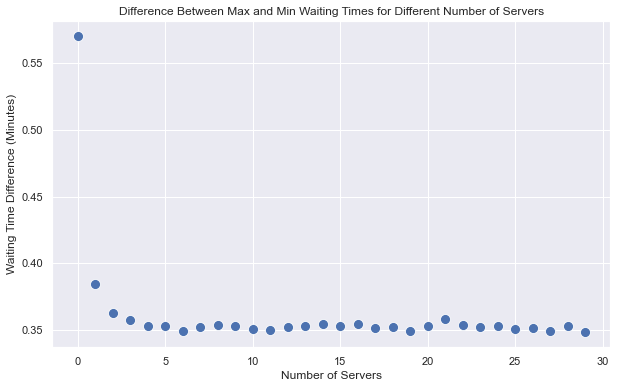

In [28]:
waiting_time_diff = df_melted.max(axis=1) - df_melted.min(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_melted.index, y=waiting_time_diff, s=100)
#sns.scatterplot(x=range(1, len(waiting_time_diff)+1), y=waiting_time_diff, color='skyblue', s=100)
plt.title("Difference Between Max and Min Waiting Times for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time Difference (Minutes)")
#plt.xticks(range(1, len(waiting_time_diff)+1))  # Set x-axis ticks to actual number of servers
plt.show()